In [24]:
import pandas as pd
import os
import logging
import base64

from datetime import datetime
from pdf2image import convert_from_path
from IPython.display import display, HTML
from io import BytesIO

In [25]:
def make_index(path: str) -> pd.DataFrame:
    """
    Creates a DataFrame with path locations of
    PDF and CSV files.
    """
    
    files=os.listdir(data_path)
    
    pdf_files = [data_path+'/'+f for f in files if f.endswith('.pdf')]
    csv_files = [data_path+'/'+f for f in files if f.endswith('.csv')]

    pdf_files.sort()
    csv_files.sort()
    
    df_final=pd.DataFrame(zip(pdf_files, csv_files),columns=['pdf_files','ground_truth'])

    return df_final
    

In [26]:
data_path='/zfs/projects/students/ltdarc-usf-intern-2025/data'


In [27]:
test_index = make_index(data_path)

In [28]:
def check_index(df: pd.DataFrame):
    """
    Function checks paths in every row to ensure they exist.
    """
    # Generate today's date
    today = datetime.now().strftime("%Y-%m-%d")

    # Ensure logs folder exists 
    os.makedirs("logs", exist_ok = True)

    #filename should include the date
    log_filename = f"logs/missing_files_{today}.log"

    #set up logging
    logging.basicConfig(
        filename=log_filename,
        level=logging.ERROR, #log should only be created if an error occurs
        format="%(asctime)s - %(levelname)s - %(message)s") #what kind of message is included in the log

    error_count = 0
    
    for idx,row in df.iterrows():
        if not os.path.exists(row['pdf_files']):
            logging.error(f"File not found: {row['pdf_files']}")
            error_count += 1
        if not os.path.exists(row['ground_truth']):
            logging.error(f"Ground truth file not found: {row['ground_truth']}")
            error_count += 1

    if error_count > 0:
        return f"{error_count} missing file(s) logged."
    else:
        return f"All files exist, no log file created."
            
        

In [29]:
check_index(test_index)

'All files exist, no log file created.'

In [30]:
def file_viewer(df: pd.DataFrame, index: int):
    """
    Generates PDF image and loads CSV table based
    on the index value of the DataFrame.
    """
    pdf_path = df.iloc[index]['pdf_files']
    csv_path = df.iloc[index]['ground_truth']

    pages = convert_from_path(pdf_path)
    img = pages[0]

    #display(pages[0])

    buffer = BytesIO()
    img.save(buffer, format="PNG")
    img_b64 = base64.b64encode(buffer.getvalue()).decode()

    img_html = f"<img src='data:image/png;base64,{img_b64}' width='850'>"

    truth=pd.read_csv(csv_path)
    table_html = truth.to_html(index=False)  # show only first few rows

    html = f"""
    <div style='display: flex; gap: 40px; align-items: flex-start;'>
        <div>{img_html}</div>
        <div style='max-width: 500px; overflow-x: auto;'>{table_html}</div>
    </div>
    """
    display(HTML(html))

    #return truth
    
    

Sr#,Channel,Title,Time,Time2,Time of Day,Year,Month,Date,Day,Day of Week,File Name,Comments,end_time,formatted_time
17148,A&E,"Criminal Minds ""Reckoner""",06:00:00,06:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,07:00:00,07:00 AM
17149,A&E,Criminal Minds (cc) (DVS),07:00:00,07:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,08:00:00,08:00 AM
17150,A&E,"Criminal Minds ""Zugzwang""",08:00:00,08:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,09:00:00,09:00 AM
17151,A&E,Criminal Minds (cc) (DVS),09:00:00,09:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,10:00:00,10:00 AM
17152,A&E,Flipping Boston (N) (cc),10:00:00,10:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,11:00:00,11:00 AM
17153,A&E,Flipping Vegas (N) (cc),11:00:00,11:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,NaN,NaN
17101,ABC/24.1,Good Morning America (N),06:00:00,06:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,07:00:00,07:00 AM
17102,ABC/24.1,KVUE News Daybreak Saturday (cc),07:00:00,07:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,09:00:00,09:00 AM
17103,ABC/24.1,Jack Hanna,09:00:00,09:00 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,09:30:00,09:30 AM
17104,ABC/24.1,Ocean Mys.,09:30:00,09:30 AM,Morning,2014,August,9,Saturday,"Saturday, August, 9, 2014, Morning",Austin_American_Statesman_Sun__Aug_3__2014_ (10),NaN,10:00:00,10:00 AM

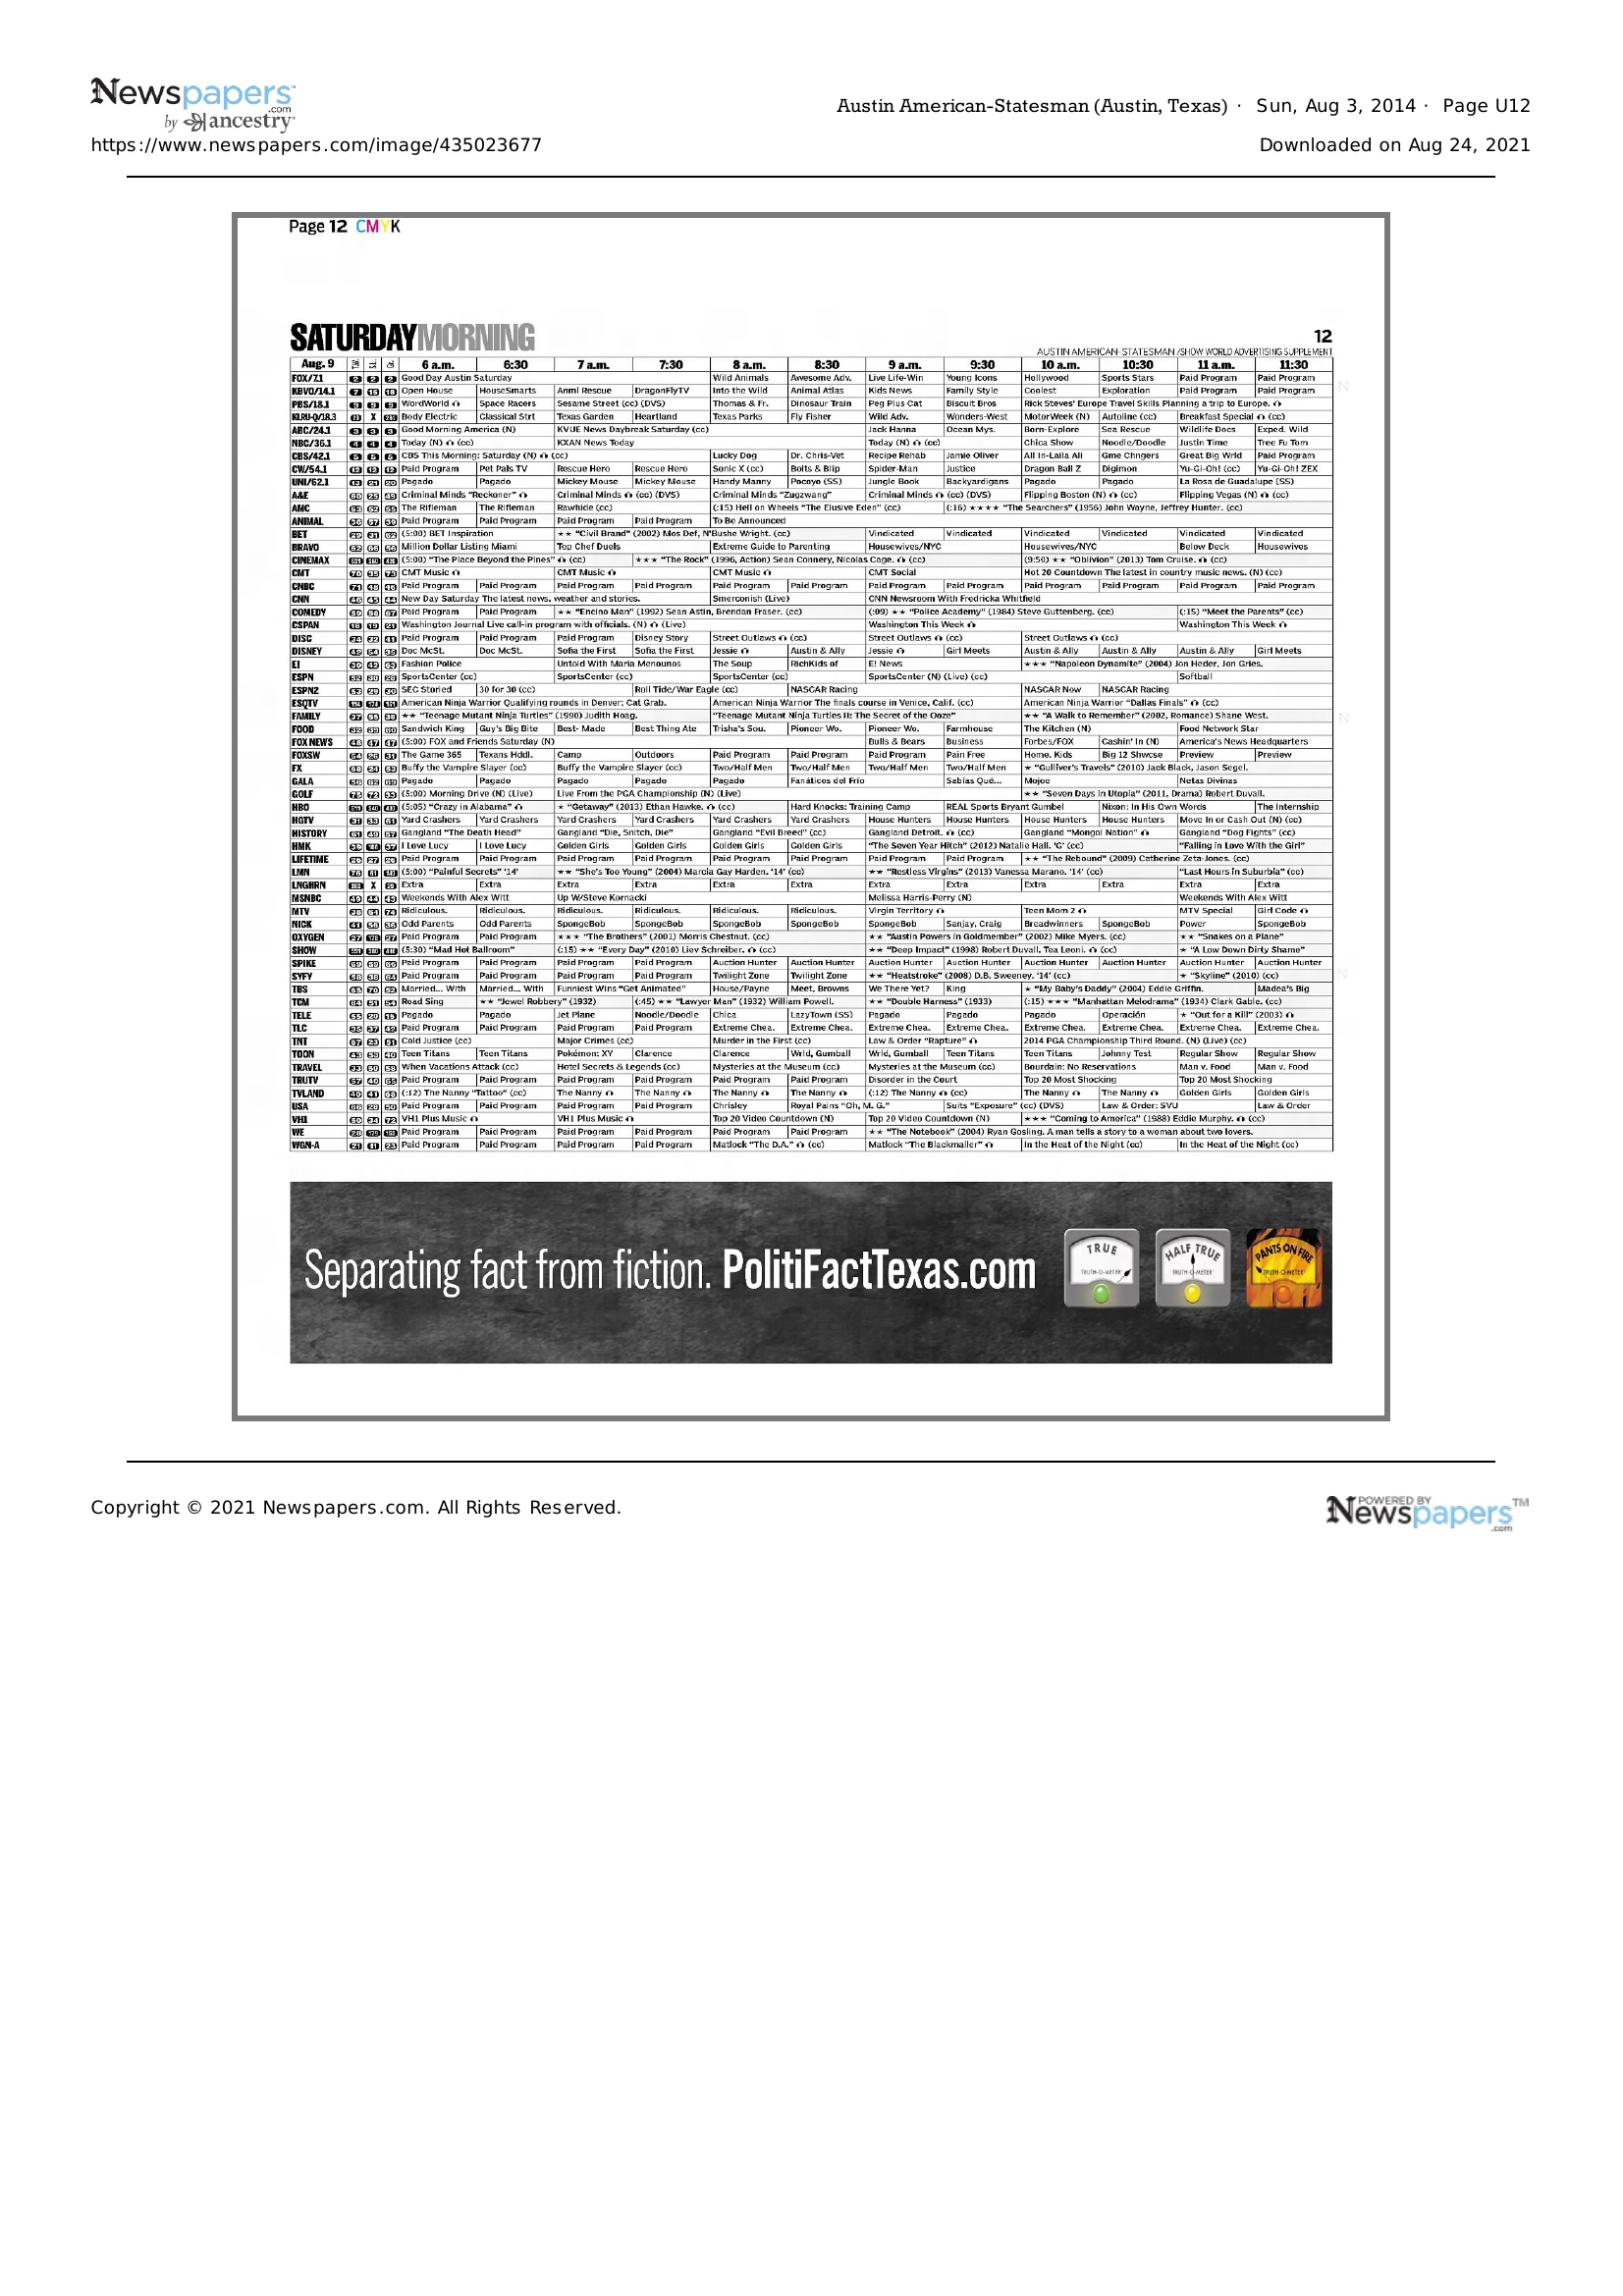

In [31]:
file_viewer(test_index, 1)